notes : use SVHN (Street View House Numbers) later in torchvision.Datasets

In [1]:
import torch
from torch import nn

In [5]:
import torchvision
import torchvision.datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [6]:
print(f" PyTorch version : {torch.__version__}")
print(f" Torchvision version : {torchvision.__version__}")

 PyTorch version : 2.1.1+cpu
 Torchvision version : 0.16.1+cpu


## Step 01 : Prepare the data
**Dataset** : We weill use the **FashionMNIST** dataset

In [8]:
# setup the training data
train_data = torchvision.datasets.FashionMNIST(
    root="fashiondata",  # where to download data to?
    train=True,  # this is training data
    download=True,  # download data if it's not present
    transform=ToTensor(),  # they come in PIL format, we transform them to Pt tensors
    target_transform=None,
)  # not tranform the targets

In [10]:
# setup the testing data
test_data = torchvision.datasets.FashionMNIST(
    root="fashiondata",  # where to download data to?
    train=False,  # get the test data
    download=True,  # download data if it's not present
    transform=ToTensor(),  # they come in PIL format, we transform them to Pt tensors
)

In [20]:
# let's check a sample of the training data
img, label = train_data[0]
print(f"The image is of shape {img.shape} and the label is {label}")

The image is of shape torch.Size([1, 28, 28]) and the label is 9


**[color_channels=1, height=28, width=28]**

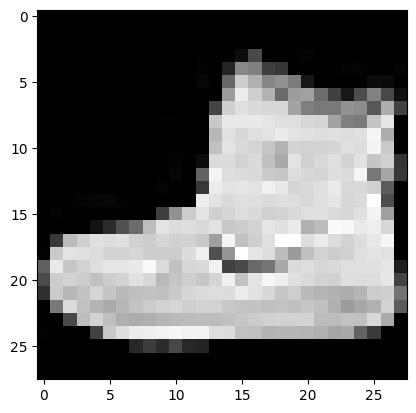

In [24]:
plt.imshow(img.squeeze(), cmap="gray")

In [51]:
images = train_data.data
first_samples = images[:16]
print(len(first_samples))

16


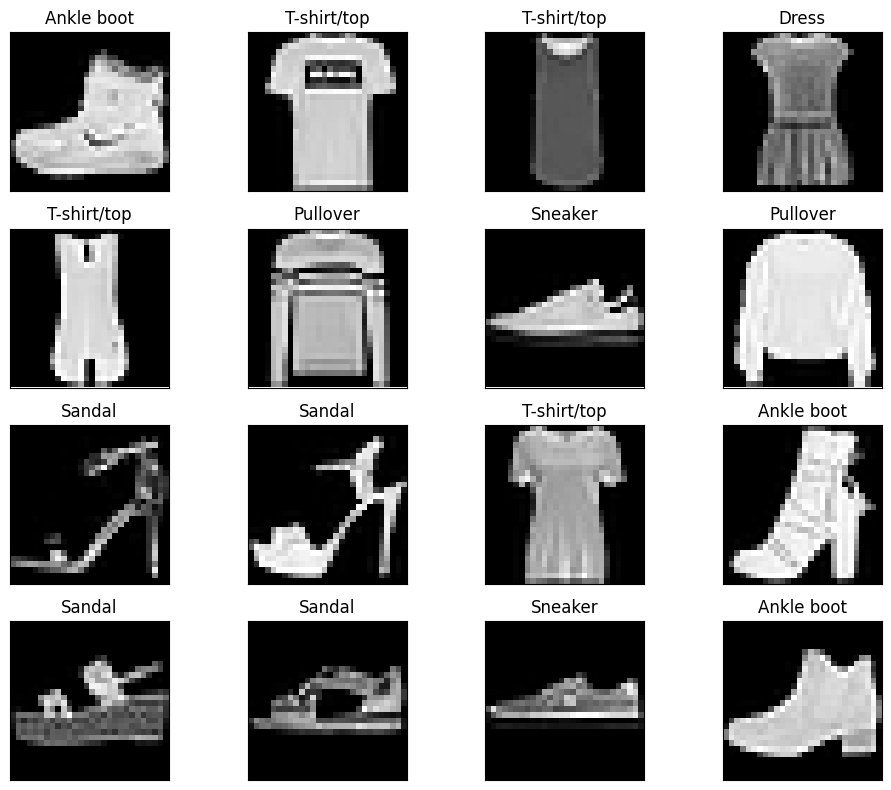

In [54]:
rows = 4
cols = 4
fig, ax = plt.subplots(rows, cols, figsize=(10, 8))
for i, axi in enumerate(ax.flat):
    axi.imshow(first_samples[i], cmap="gray")
    axi.set_title(train_data.classes[train_data.targets[i].item()])
    axi.set_xticks([])
    axi.set_yticks([])

plt.tight_layout()
plt.show()

Now let's see how many train and test data we have

In [41]:
print(f"We have {len(train_data)} training samples and {len(test_data)} test samples")

We have 60000 training samples and 10000 test samples


Let's check the classes we got

In [48]:
classes_names = train_data.classes
print(f"We have {len(classes_names)} classes \nClasses : \n{classes_names}")

We have 10 classes 
Classes : 
['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


We have a multiclass classification

## Step 02 : Prepare the dataloader

It helps load data into a model for training and for inference.

It turns a large Dataset into a Python iterable of smaller chunks called batches because it's more compatitionally efficient

In [69]:
# we start with a batch size of 32
from torch.utils.data import DataLoader

BATCH_SIZE = 32
training_dataloader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)
testing_dataloader = DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=False)

In [70]:
print(
    f"Length of training dataloader : {len(training_dataloader)} batches of {BATCH_SIZE}"
)
print(
    f"Length of testing dataloader : {len(testing_dataloader)} batches of {BATCH_SIZE}"
)

Length of training dataloader : 1875 batches of 32
Length of testing dataloader : 313 batches of 32


In [71]:
# Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(training_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

## Setp 03 : Building a base model

In [75]:
# create a flatten model 
flatten_model = nn.Flatten()
x = train_features_batch[0]
output = flatten_model(x)
print(f"Shape before flattening: {x.shape} -> [color_channels, height, width]")
print(f"Shape after flattening: {output.shape} -> [color_channels, height*width]")


Shape before flattening: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Shape after flattening: torch.Size([1, 784]) -> [color_channels, height*width]


In [77]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
    def __init__(self, input_shape :int, hidden_units:int, output_shape : int):
        super.__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(input_shape, hidden_units), # in_features = number of features in a data sample (784 pixels)
            nn.Linear(hidden_units, output_shape)
        )
    def forward(self, x):
        return self.layer_stack(x)